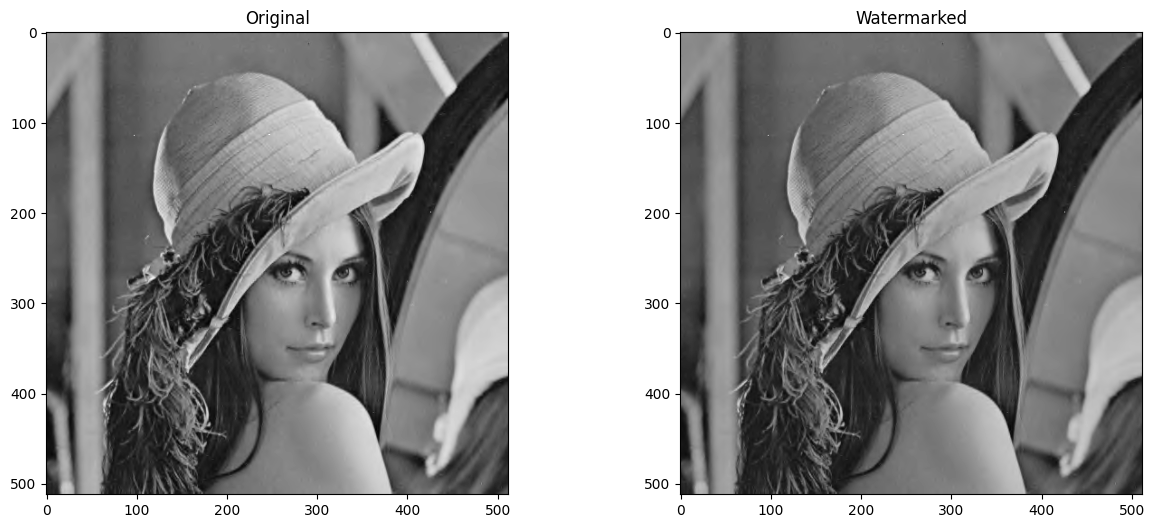

wPSNR: 64.55dB
Mark has been lost,wp: 40.36811753977729
Mark has been lost,wp: 54.391404049790324
Mark has been found 53.004875450567056
Mark has been lost,wp: 24.161409527733248
Mark has been found 9999999


In [2]:
import detection
import attack
import embedding
import cv2
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import convolve2d

from math import sqrt





def wpsnr(img1, img2):
  img1 = np.float32(img1)/255.0
  img2 = np.float32(img2)/255.0
  difference = img1-img2
  same = not np.any(difference)
  if same is True:
      return 9999999
  csf = np.genfromtxt('csf.csv', delimiter=',')
  ew = convolve2d(difference, np.rot90(csf,2), mode='valid')
  decibels = 20.0*np.log10(1.0/sqrt(np.mean(np.mean(ew**2))))
  return decibels



# load the image
img_path='lena_grey.bmp'
mark_path='mark.npy'
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
#Embed the watermark and save it
watermarked = embedding.embedding(img_path,mark_path)

#plot the original and watermarked image
cv2.imwrite('watermarked.bmp', watermarked)
plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.title('Original')
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.title('Watermarked')
plt.imshow(watermarked,cmap='gray')
plt.show()

#check the quality of the watermarked image with respect to the original image

w = wpsnr(image, watermarked)
print('wPSNR: %.2fdB' % w)

attacked = attack.attack('watermarked.bmp',"jpeg_compression", {'qf':10})
#Detect the watermark
d,wp = detection.detection(image, watermarked, attacked)
if d:
    print('Mark has been found',wp)
else:
    print('Mark has been lost,wp:',wp)




attacked = attack.attack('watermarked.bmp',"gauss_edge", {'sigma':0.6, 'edge_func':0})
#Detect the watermark
d,wp = detection.detection(image, watermarked, attacked)
if d:
    print('Mark has been found',wp)
else:
    print('Mark has been lost,wp:',wp)



attacked = attack.attack('watermarked.bmp',"sharp_gauss",{'sigma':0.3, 'alpha':0.1})
d,wp = detection.detection(image, watermarked, attacked)
if d:
    print('Mark has been found',wp)
else:
    print('Mark has been lost,wp:',wp)


attacked = attack.attack('watermarked.bmp',"awgn_dwt",{'mean':0, 'std':[0,0,0,0], 'seed':123})
d,wp = detection.detection(image, watermarked, attacked)
if d:
    print('Mark has been found',wp)
else:
    print('Mark has been lost,wp:',wp)



attacked = attack.attack('watermarked.bmp',"awgn_dwt",{'mean':0, 'std':[0,0,0,0], 'seed':123})
d,wp = detection.detection(image, watermarked, watermarked)
if d:
    print('Mark has been found',wp)
else:
    print('Mark has been lost,wp:',wp)
    


total_history,total_succesfull_attacks,points =  test_utility.test_pipelines(
    alpha =0.88, 
    max_layer=2, 
    num_images=3,
    embedding_fn=embedding.embedding,
    attacks_list=attacks.attack_incremental_paramters,
    detection_fn=detection.detection)

